In [31]:
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import scipy

In [2]:
width=60
img = np.random.normal(size=(width, width))
img[30:35, 40:45] = 1
flat_img = img.flatten()

In [3]:
def distance_matrix(width, max_rad, distance_weight):
    num_pixels = width**2
    
    data = []
    row_ind = []
    col_ind = []
    
    indices = np.arange(num_pixels).reshape(width, width)
    for i in range(width):
        for j in range(width):
            W_row = indices[i,j]
            #* Now sample neighbors of the current pixel
            for k in range(-max_rad, max_rad+1):
                if k == 0 or i + k < 0 or i + k >= width: continue
                for l in range(-max_rad, max_rad+1):
                    if l==0 or j + l < 0 or j + l >= width: continue
    
                    dist = np.sqrt(k**2 + l**2)
                    if dist > max_rad:
                        continue
    
                    W_col = indices[i+k, j+l]
    
                    data.append(distance_weight(dist))
                    row_ind.append(W_row)
                    col_ind.append(W_col)

    return csr_matrix((data, (row_ind, col_ind)), shape=(num_pixels, num_pixels))

def local_I(img, W):
    flat_img = img.flatten()
    mean = np.mean(flat_img)
    deviations = flat_img-mean
    m2 = np.sum(np.square(deviations))/(img.shape[0]*img.shape[1])
    local_i = deviations/m2 * W.multiply(deviations)
    return local_i.reshape(img.shape)

def global_I(img, W):
    local = local_I(img, W)

    return np.sum(local)/(img.shape[0]*img.shape[1])

def local_geary_c(img, W):
    flat_img = img.flatten()
    mean = np.mean(flat_img)
    deviations = flat_img-mean

    m2 = np.sum(np.square(deviations))/(img.shape[0]*img.shape[1]-1)

    x = flat_img.reshape(len(flat_img), 1)
    diff_matrix = np.square(x - x.T)
    
    local_c = np.sum(W * diff_matrix, axis=0)
    return local_c.reshape(img.shape)

In [29]:
W = distance_matrix(width, 4, lambda dist : 1/dist)
c = local_geary_c(img, W)
i = local_I(img, W)

Inet = global_I(img, W)
Inet

-0.003987152563712642

In [33]:
null_i = []

for i in range(5000):
    null_img = np.random.normal(size=(width, width))
    null_i.append(global_I(null_img, W))


In [36]:
p = np.mean(np.abs(null_i) > Inet)

print(p)

1.0


In [37]:
np.abs(null_i) > Inet

array([ True,  True,  True, ...,  True,  True,  True])

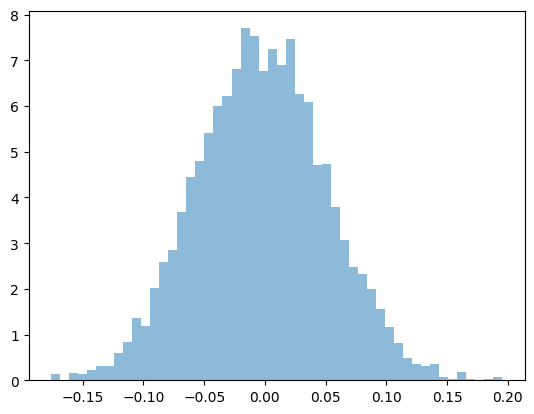

In [28]:
plt.hist(null_i, bins=50, alpha=0.5, label='Null distribution', density=True)
plt.show()

-0.003987152563712642

In [23]:

#* Using formulas from https://en.wikipedia.org/wiki/Moran%27s_I
#* Simplify using the fact that W is symmetric

flat_img = img.flatten()
mean = np.mean(flat_img)
deviations = flat_img-mean

Wsum = np.sum(W)

N = width**2
I_expected = -1/(N-1)
I_expected

S1 = 2 * np.sum(np.square(W.nonzero()), dtype=np.float64)
S2 = np.sum(np.square(2 * np.sum(W, axis=0))) 
S3 = (1/N) * np.sum(np.power(deviations, 4))/np.square((1/N) * np.sum(np.square(deviations)))
S4 = (N**2 - 3*N + 3)*S1 -N*S2 + 3*(Wsum**2)
S5 = (N**2 - N) * S1 - 2*N*S2 + 6*Wsum**2

VarI = (N*S4-S3*S5)/((N-1)*(N-2)*(N-3)*(Wsum**2)) - I_expected**2
print("Expected:", I_expected)
print("True:", Inet)
print(np.sqrt(VarI))
print((I_expected - Inet)/np.sqrt(VarI))

Expected: -0.0002778549597110308
True: -0.003987152563712642
31.77882043745371
0.00011672231860531638


In [22]:
S1

1840381795512

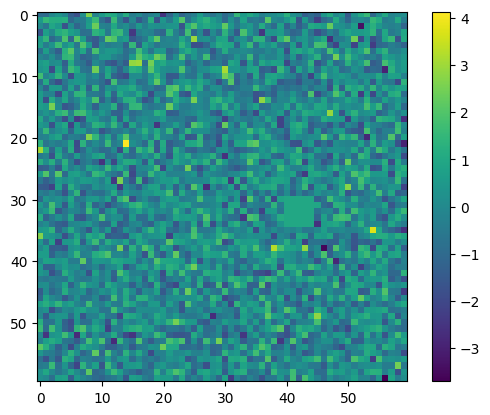

In [38]:
plt.imshow(img)
plt.colorbar()

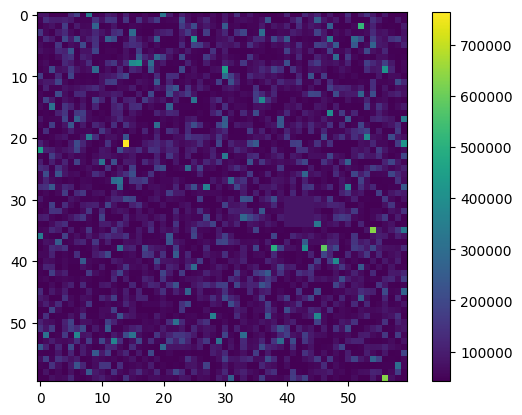

In [6]:
plt.imshow(c)
plt.colorbar()

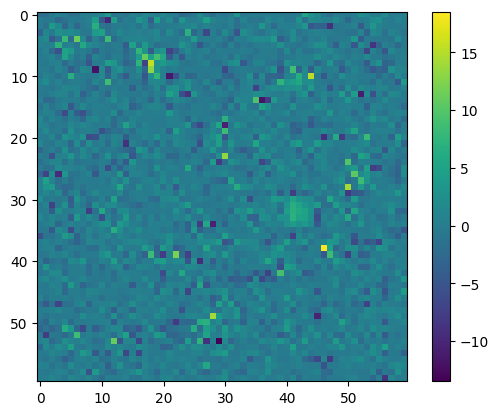

In [7]:
plt.imshow(i)
plt.colorbar()

In [8]:
a = np.array([1, 2, 3])
x = a.reshape(len(a), 1)
x - x.T

array([[ 0, -1, -2],
       [ 1,  0, -1],
       [ 2,  1,  0]])